In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [69]:
latency_10 = pd.read_csv("data/20211110T224018_10-10000-iperf.csv")
latency_50 = pd.read_csv("data/20211110T231000_50-10000-iperf.csv")
latency_100 = pd.read_csv("data/20211111T002932_100-10000-iperf.csv")
latency_150 = pd.read_csv("data/20211111T054500_150-10000-iperf.csv")
latency_200 = pd.read_csv("data/20211112T183306_200-10000-iperf.csv")

In [73]:
latency_10

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs,pck_ct,packet_size_total,total_bytes,latency
0,1636584018,172.23.0.3,45478,172.19.0.2,5001,6,454500,8424,303,162,1636584018643;1636584018643;1636584018643;1636...,52;1500;1500;52;52;1500;1500;52;1500;52;52;150...,2;1;1;2;2;1;1;2;1;2;2;1;1;2;2;1;1;2;2;1;1;2;2;...,465,465,462924,10
1,1636584019,172.23.0.3,45478,172.19.0.2,5001,6,1165500,19292,777,371,1636584019004;1636584019004;1636584019004;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,1148,1148,1184792,10
2,1636584019,FE80::B434:E7FF:FE8B:775,0,FF02::2,0,58,56,0,1,0,1636584019063;,56;,1;,1,1,56,10
3,1636584020,172.23.0.3,45478,172.19.0.2,5001,6,913500,15184,609,292,1636584020008;1636584020008;1636584020008;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;1;1;2;1;1;2;1;1;...,901,901,928684,10
4,1636584021,172.23.0.3,45478,172.19.0.2,5001,6,1182000,20956,788,403,1636584021029;1636584021029;1636584021029;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;1;1;2;1;2;1;1;2;...,1191,1191,1202956,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1636584315,172.23.0.3,45478,172.19.0.2,5001,6,1390500,24024,927,462,1636584315002;1636584315002;1636584315002;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,1389,1389,1414524,10
304,1636584316,172.23.0.3,45478,172.19.0.2,5001,6,1174500,20332,783,391,1636584316000;1636584316000;1636584316000;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,1174,1174,1194832,10
305,1636584317,172.23.0.3,45478,172.19.0.2,5001,6,1435500,24804,957,477,1636584317002;1636584317002;1636584317002;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,1434,1434,1460304,10
306,1636584318,172.23.0.3,45478,172.19.0.2,5001,6,1513500,26000,1009,500,1636584318051;1636584318051;1636584318051;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;1;2;1;1;2;1;1;2;...,1509,1509,1539500,10


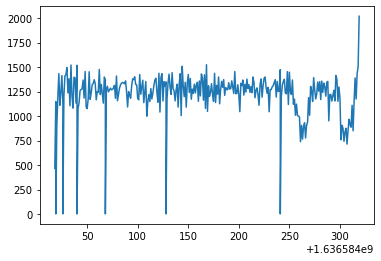

In [50]:
plt.plot(latency_10['Time'], latency_10['pck_ct'])

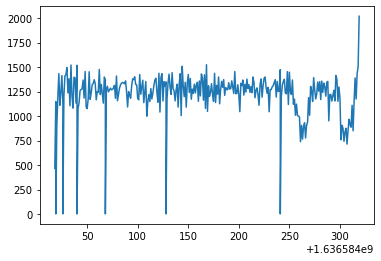

In [129]:
plt.plot(latency_10['Time'], latency_10['packet_size_total'])

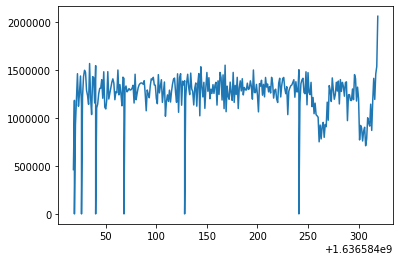

In [130]:
plt.plot(latency_10['Time'], latency_10['total_bytes'])
#plt.plot(latency_50['Time'], latency_50['total_bytes'])
#plt.plot(latency_100['Time'], latency_100['total_bytes'])
#plt.plot(latency_150['Time'], latency_150['total_bytes'])
#plt.plot(latency_200['Time'], latency_200['total_bytes'])

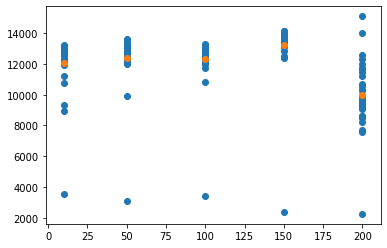

In [99]:
plt.scatter(full_df['latency'], full_df['pck_ct'])
mean_10 = full_df[full_df['latency']==10]['pck_ct'].mean()
mean_50 = full_df[full_df['latency']==50]['pck_ct'].mean()
mean_100 = full_df[full_df['latency']==100]['pck_ct'].mean()
mean_150 = full_df[full_df['latency']==150]['pck_ct'].mean()
mean_200 = full_df[full_df['latency']==200]['pck_ct'].mean()
plt.scatter([10, 50, 100, 150, 200], [mean_10, mean_50, mean_100, mean_150, mean_200])

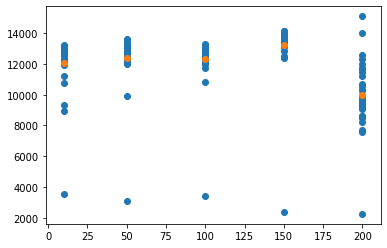

In [98]:
plt.scatter(full_df['latency'], full_df['packet_size_total'])
mean_10 = full_df[full_df['latency']==10]['packet_size_total'].mean()
mean_50 = full_df[full_df['latency']==50]['packet_size_total'].mean()
mean_100 = full_df[full_df['latency']==100]['packet_size_total'].mean()
mean_150 = full_df[full_df['latency']==150]['packet_size_total'].mean()
mean_200 = full_df[full_df['latency']==200]['packet_size_total'].mean()
plt.scatter([10, 50, 100, 150, 200], [mean_10, mean_50, mean_100, mean_150, mean_200])

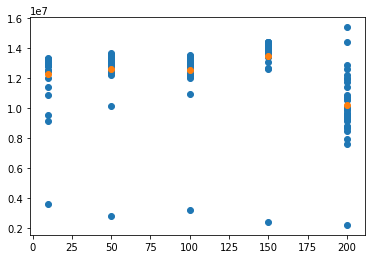

In [97]:
plt.scatter(full_df['latency'], full_df['total_bytes'])
mean_10 = full_df[full_df['latency']==10]['total_bytes'].mean()
mean_50 = full_df[full_df['latency']==50]['total_bytes'].mean()
mean_100 = full_df[full_df['latency']==100]['total_bytes'].mean()
mean_150 = full_df[full_df['latency']==150]['total_bytes'].mean()
mean_200 = full_df[full_df['latency']==200]['total_bytes'].mean()
plt.scatter([10, 50, 100, 150, 200], [mean_10, mean_50, mean_100, mean_150, mean_200])

# Model

In [70]:
def pckt_count(a):
    a = a.split(';')
    a = [int(i) for i in a[:-1]]
    return len(a)

latency_10['pck_ct'] = latency_10['packet_times'].apply(pckt_count)
latency_50['pck_ct'] = latency_50['packet_times'].apply(pckt_count)
latency_100['pck_ct'] = latency_100['packet_times'].apply(pckt_count)
latency_150['pck_ct'] = latency_150['packet_times'].apply(pckt_count)
latency_200['pck_ct'] = latency_200['packet_times'].apply(pckt_count)

latency_10['packet_size_total'] = latency_10['1->2Pkts'] + latency_10['2->1Pkts']
latency_50['packet_size_total'] = latency_50['1->2Pkts'] + latency_50['2->1Pkts']
latency_100['packet_size_total'] = latency_100['1->2Pkts'] + latency_100['2->1Pkts']
latency_150['packet_size_total'] = latency_150['1->2Pkts'] + latency_150['2->1Pkts']
latency_200['packet_size_total'] = latency_200['1->2Pkts'] + latency_200['2->1Pkts']

latency_10['total_bytes'] = latency_10['1->2Bytes'] + latency_10['2->1Bytes']
latency_50['total_bytes'] = latency_50['1->2Bytes'] + latency_50['2->1Bytes']
latency_100['total_bytes'] = latency_100['1->2Bytes'] + latency_100['2->1Bytes']
latency_150['total_bytes'] = latency_150['1->2Bytes'] + latency_150['2->1Bytes']
latency_200['total_bytes'] = latency_200['1->2Bytes'] + latency_200['2->1Bytes']

latency_10['latency'] = [10] * len(latency_10)
latency_50['latency'] = [50] * len(latency_50)
latency_100['latency'] = [100] * len(latency_100)
latency_150['latency'] = [150] * len(latency_150)
latency_200['latency'] = [200] * len(latency_200)

#number of changes in direction in "packet_dirs"

def agg_10sec(df):
    new_df = pd.DataFrame()
    min_time = df["Time"][0]
    latency = df["latency"][0]
    while min_time < df["Time"][len(df)-1]:
        temp_df = df[(df["Time"] >= min_time) & (df["Time"] < min_time+10)]
        row = temp_df[["1->2Bytes", "2->1Bytes", "1->2Pkts", "2->1Pkts", "packet_size_total", "pck_ct", "total_bytes"]].sum().to_frame().T
        row["packet_sizes_var"] = temp_df["packet_size_total"].var()
        row["Time"] = min_time
        row["latency"] = latency
        new_df = new_df.append(row)
        min_time += 10
    return new_df.reset_index(drop=True)

agg_10 = agg_10sec(latency_10)
agg_50 = agg_10sec(latency_50)
agg_100 = agg_10sec(latency_100)
agg_150 = agg_10sec(latency_150)
agg_200 = agg_10sec(latency_200)

In [71]:
full_df = pd.concat([agg_10, agg_50, agg_100, agg_150, agg_200])

In [265]:
def linear_regression(df):
    # Load the dataset 'packet_sizes_var', "Time"
    features = ['packet_size_total', 'pck_ct', "total_bytes", 'packet_sizes_var']
    df_X = df[features]
    df_y = df['latency']

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    return r2_score(y_test.reset_index(drop=True), y_pred), y_test.reset_index(drop=True), y_pred

In [266]:
results = []
for i in range(100):
    results.append(linear_regression(full_df))

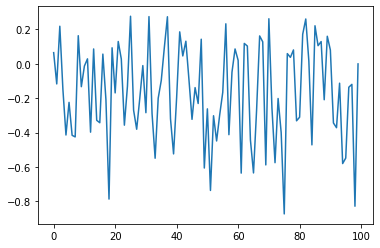

In [267]:
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

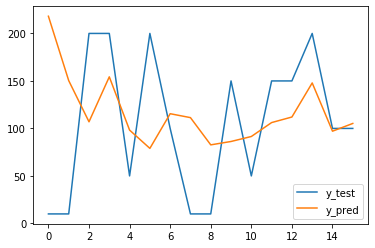

In [268]:
result = linear_regression(full_df)
plt.plot(result[1])
plt.plot(result[2])
plt.legend(["y_test", "y_pred"])

In [261]:
def decision_tree(df):
    # Load the dataset 'packet_sizes_var', "Time"
    features = ['packet_size_total', 'pck_ct', "total_bytes", 'packet_sizes_var']
    df_X = df[features]
    df_y = df['latency']

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = tree.DecisionTreeClassifier()

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), y_test.reset_index(drop=True), y_pred

In [262]:
results = []
for i in range(100):
    results.append(decision_tree(full_df))

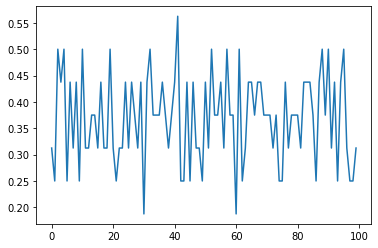

In [263]:
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

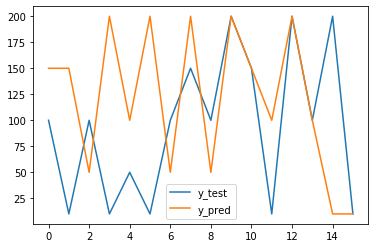

In [264]:
result = decision_tree(full_df)
plt.plot(result[1])
plt.plot(result[2])
plt.legend(["y_test", "y_pred"])

In [272]:
def svm(df):
    # Load the dataset 'packet_sizes_var', "Time"
    features = ['packet_size_total', 'pck_ct', "total_bytes", 'packet_sizes_var', 'Time']
    df_X = df[features]
    df_y = df['latency']

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), y_test.reset_index(drop=True), y_pred

In [273]:
results = []
for i in range(100):
    results.append(svm(full_df))

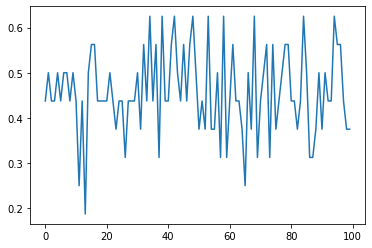

In [274]:
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

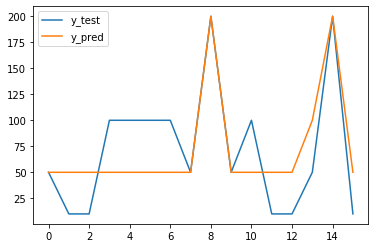

In [255]:
result = svm(full_df)
plt.plot(result[1])
plt.plot(result[2])
plt.legend(["y_test", "y_pred"])